<a href="https://colab.research.google.com/github/Chiraggoyalc/Chiraggoyalc/blob/main/building_a_brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


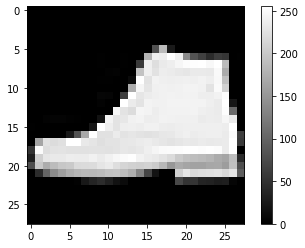

In [3]:
import matplotlib.pyplot as plt

# The question number to study with. Feel free to change up to 59999.
data_idx = 42

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
train_labels[data_idx]

9

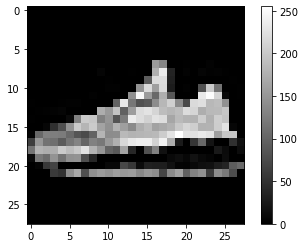

In [5]:
import matplotlib.pyplot as plt

# The question number to quiz with. Feel free to change up to 9999.
data_idx = 6174

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
valid_labels[data_idx]

7

In [7]:
# 28 lists with 28 values each
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
number_of_classes = train_labels.max() + 1
number_of_classes

10

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [11]:
image_height = 28
image_width = 28

number_of_weights = image_height * image_width * number_of_classes
number_of_weights

7840

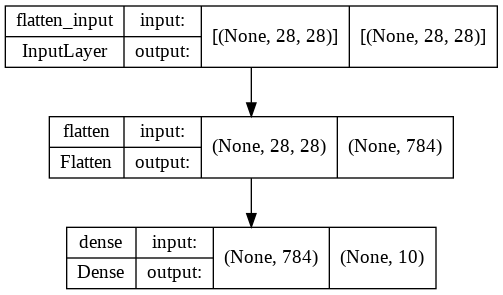

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 17.0159 - accuracy: 0.7454 - val_loss: 19.4431 - val_accuracy: 0.7077
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 11.8207 - accuracy: 0.7906 - val_loss: 11.1118 - val_accuracy: 0.7843
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 10.9038 - accuracy: 0.7964 - val_loss: 9.5215 - val_accuracy: 0.8096
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 10.6544 - accuracy: 0.7997 - val_loss: 12.9852 - val_accuracy: 0.7610
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 10.7890 - accuracy: 0.7994 - val_loss: 11.6827 - val_accuracy: 0.7841


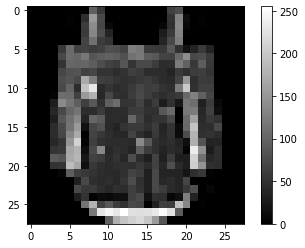

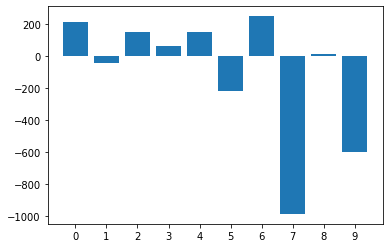

correct answer: 6


In [15]:
data_idx = 8675 # The question number to study with. Feel free to change up to 59999.

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[data_idx])

In [16]:
model.predict(train_images[0:10])

array([[-1.03043167e+02, -3.58532196e+02, -1.28606216e+02,
        -2.54522873e+02, -1.23492523e+02,  6.80259460e+02,
         9.24036255e+01,  4.35018036e+02,  2.60496704e+02,
         8.07807129e+02],
       [ 4.94710266e+02, -2.48337112e+02,  1.90308334e+02,
         1.26027359e+02, -1.06603022e+01, -1.32502942e+03,
         3.75655060e+02, -2.10996362e+03, -2.13564911e+01,
        -8.69212463e+02],
       [ 1.45841339e+02,  2.62169342e+01,  9.43907700e+01,
         1.23072128e+02,  1.15001785e+02, -4.86747009e+02,
         1.30608307e+02, -6.09473816e+02, -7.04681931e+01,
        -2.24415634e+02],
       [ 2.40689941e+02,  3.51766090e+01,  1.80549438e+02,
         2.07048828e+02,  1.06463181e+02, -6.32028381e+02,
         2.54108429e+02, -1.23074585e+03, -5.37494812e+01,
        -6.41017029e+02],
       [ 2.96619354e+02,  2.19866791e+02,  1.77185532e+02,
         3.19760712e+02,  2.85725250e+02, -8.50184570e+02,
         2.64637329e+02, -9.60757996e+02, -3.40042114e-01,
        -6.